In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

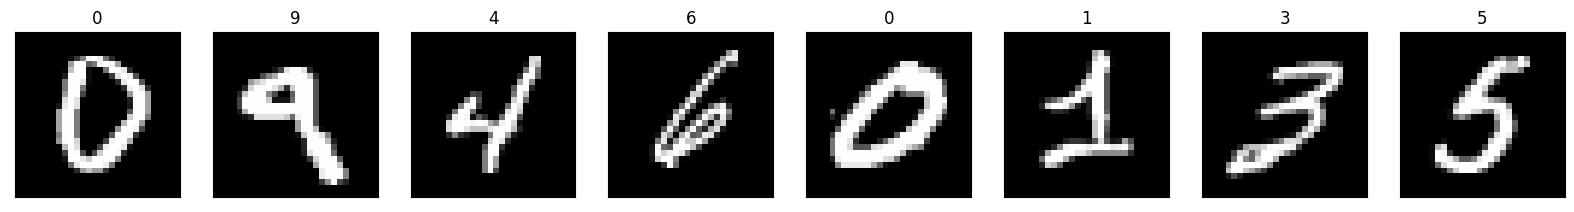

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.cm as cm
import numpy as np
from random import randint
# plot first six training images
fig = plt.figure(figsize=(20,20))
rar=[randint(0,1000) for i in range(8)]
k=0

for i in rar:  
    try:  
        ax = fig.add_subplot(1, 8, k+1, xticks=[], yticks=[])
        ax.imshow(X_train[i], cmap='gray')
        ax.set_title(str(y_train[i]))
        k=k+1
    except:pass

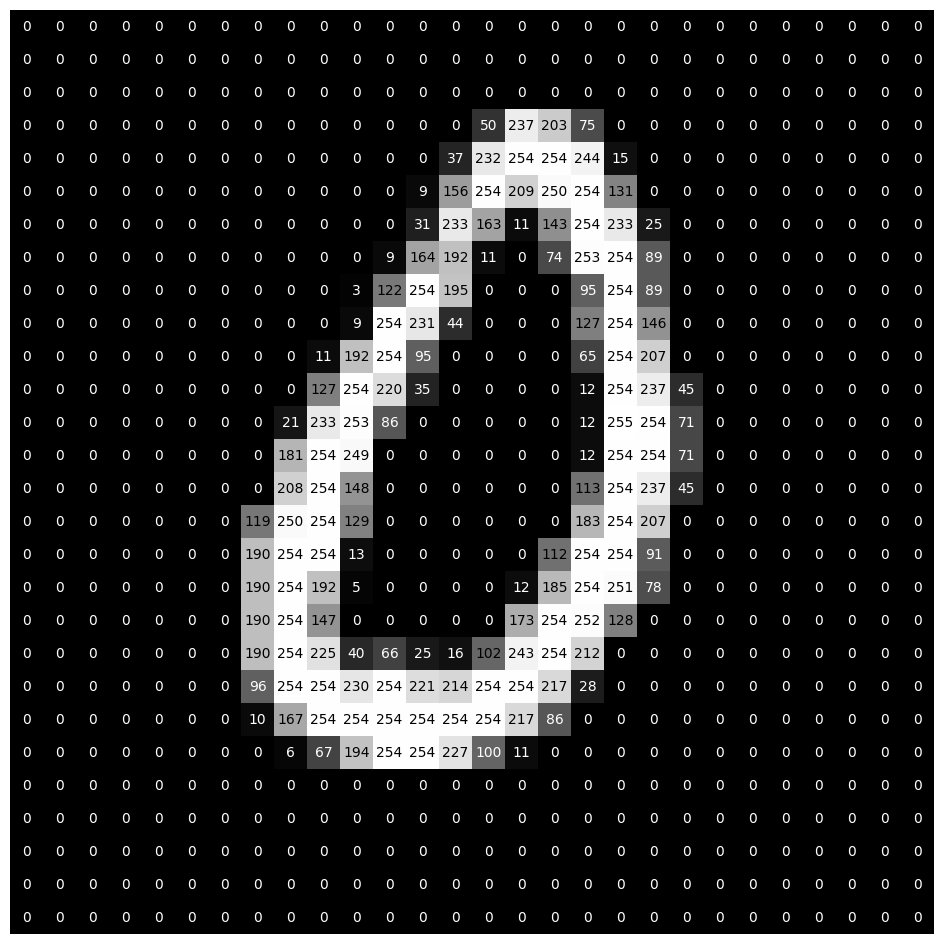

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')


fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.axis('off')
visualize_input(X_train[666], ax)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
#scaline between 0 and 1 for better performance
from keras.utils.np_utils import to_categorical as to_Catagorical

y_train=to_Catagorical(y_train,num_classes=10)
y_test=to_Catagorical(y_test,num_classes=10)
#one hot encoding


X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

#reshape we reshape to make it 4d array, the 4th dimension is the number of channels
#in this case we have 1 channel because we have grayscale images, if we had RGB images we would have 3 channels
#okay?

In [8]:
model_pool=Sequential([
    Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2) ),
    Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',strides=1),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
    ])

model_pool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [11]:
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [9]:

model_pool.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])


In [14]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weirghts.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_pool.fit(X_train, y_train, batch_size=32, epochs=4,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)



Epoch 1/4

Epoch 1: val_loss improved from inf to 0.06275, saving model to model.weirghts.best.hdf5
1875/1875 - 38s - loss: 0.1278 - accuracy: 0.9605 - val_loss: 0.0628 - val_accuracy: 0.9788 - 38s/epoch - 20ms/step
Epoch 2/4

Epoch 2: val_loss improved from 0.06275 to 0.03557, saving model to model.weirghts.best.hdf5
1875/1875 - 42s - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0356 - val_accuracy: 0.9887 - 42s/epoch - 22ms/step
Epoch 3/4

Epoch 3: val_loss improved from 0.03557 to 0.03267, saving model to model.weirghts.best.hdf5
1875/1875 - 39s - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9898 - 39s/epoch - 21ms/step
Epoch 4/4

Epoch 4: val_loss improved from 0.03267 to 0.02648, saving model to model.weirghts.best.hdf5
1875/1875 - 39s - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0265 - val_accuracy: 0.9908 - 39s/epoch - 21ms/step


In [13]:
""" 
for some reason my model is sucking 


, so now ill load the weights from  the  pretrained model by the author 
"""

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])




from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best_my.hdf5', verbose=1, 
                               save_best_only=True)


hist = model.fit(X_train, y_train, batch_size=32, epochs=1,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


#model_pool.load_weights(r"C:\Users\defaultuser0.LAPTOP-LRB3T941\OneDrive\Documents\Tensorflow\COMPUTER VISION BOOK\model.weights.best(1).hdf5")


Epoch 1: val_loss improved from inf to 0.04981, saving model to model.weights.best_my.hdf5
1875/1875 - 42s - loss: 0.1405 - accuracy: 0.9568 - val_loss: 0.0498 - val_accuracy: 0.9830 - 42s/epoch - 23ms/step


so my model was sucking because i didnt give any strids 

NEW ARTICHETURE



In [ ]:
from keras.layers import Dropout

model_pool=Sequential([
    Conv2D(90,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'),
    Dropout(0.1),
    MaxPooling2D(pool_size=(2,2) ),
    Dropout(0.1),
    Conv2D(180,kernel_size=(3,3),padding='same',activation='relu',strides=1),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(179,activation='relu'),
    Dropout(0.6),
    Dense(10,activation='softmax')
    ])

model_pool.summary()

model_pool.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint   


checkpointer = ModelCheckpoint(filepath='model.weirghts_NEW ARTICHETURE.hdf5', verbose=1, 
                               save_best_only=True)
hist = model_pool.fit(X_train, y_train, batch_size=32, epochs=13,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


#The model will be run on kaggle , not here, because of the GPU,ill run it on kaggle and then ill upload the weights here

In [ ]:
model_pool.evaluate(X_test, y_test, verbose=2)

In [1]:
import pandas as pd 
hello=pd.read_csv(r'C:\Users\defaultuser0.LAPTOP-LRB3T941\OneDrive\Documents\Tensorflow\KAGGLE COMPETITION\Titanic\sample_submission.csv')

In [8]:
hello.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [16]:
deff= pd.read_csv(r'C:\Users\defaultuser0.LAPTOP-LRB3T941\OneDrive\Documents\Tensorflow\KAGGLE COMPETITION\Titanic\hello.csv')

In [17]:
deff.columns

Index(['ImageId', 'Label'], dtype='object')

In [22]:
deff.head()
deff.shape

(28000, 2)

In [23]:
for i in range(28000):
    deff['ImageId'][i]=i+1

In [24]:
deff.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [10]:
deff.to_csv('mnisdt.csv', index=False)

In [14]:
deff.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
